In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# In AAPL.ipynb
from stock_data import StockData
# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


## Load or download a data (NVDA)

In [2]:
# ============================================
# Download META daily data for a year
# ============================================

ticker = "NVDA"
stock = StockData(ticker, start_date="2009-02-14", end_date="2020-06-03")

df = stock.load_data()
df.head()



C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\stock_data.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.df = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2009-02-17,0.179480,0.187732,0.178793,0.183377,779576000
2009-02-18,0.184294,0.190254,0.179251,0.179480,646252000
2009-02-19,0.170082,0.189566,0.170082,0.187961,743988000
2009-02-20,0.174437,0.177188,0.166185,0.167790,770056000
2009-02-23,0.166415,0.178334,0.165269,0.177417,679548000


# 1. Data profiling

In [3]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'NVDA')), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()




Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


# - Summary Statistics 

In [4]:

stock.inspect_data()




📌 Dataset Shape for NVDA: (2843, 6)

📌 First 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2009-02-17,0.179480,0.187732,0.178793,0.183377,779576000,NVDA
2009-02-18,0.184294,0.190254,0.179251,0.179480,646252000,NVDA
2009-02-19,0.170082,0.189566,0.170082,0.187961,743988000,NVDA
2009-02-20,0.174437,0.177188,0.166185,0.167790,770056000,NVDA
2009-02-23,0.166415,0.178334,0.165269,0.177417,679548000,NVDA



📌 Last 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2020-05-27,8.492886,8.599977,7.966391,8.592256,1175892000,NVDA
2020-05-28,8.454780,8.727241,8.347438,8.380313,734896000,NVDA
2020-05-29,8.841806,8.841806,8.452789,8.522025,745256000,NVDA
2020-06-01,8.772819,8.807188,8.656512,8.799716,389876000,NVDA
2020-06-02,8.791745,8.803700,8.625130,8.762856,391320000,NVDA



📌 Random 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2010-07-21,0.237702,0.248247,0.235410,0.248017,624940000,NVDA
2012-06-12,0.286756,0.289507,0.283776,0.284235,496128000,NVDA
2010-07-12,0.241599,0.244579,0.237015,0.237244,565396000,NVDA
2010-07-01,0.237932,0.239536,0.227617,0.234723,737008000,NVDA
2016-06-28,1.126679,1.132816,1.111215,1.131589,381920000,NVDA



📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2843 entries, 2009-02-17 to 2020-06-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2843 non-null   float64
 1   High    2843 non-null   float64
 2   Low     2843 non-null   float64
 3   Open    2843 non-null   float64
 4   Volume  2843 non-null   int64  
 5   Ticker  2843 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 155.5+ KB


In [5]:
# check if a null value exists


key_cols = ['Close', 'Open', 'High', 'Volume', 'Ticker']

stock.check_missing_values()



📌 Missing values per column:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

📌 Columns with >5% missing values:
✔️ None

📌 Total rows with missing values in key columns ['Close', 'Open', 'High', 'Volume']: 0
✔️ No missing rows in key columns

📌 Duplicate rows: 0

📌 Cardinality (categoricals): {'Ticker': 1}


In [6]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
Price        Close         High          Low         Open        Volume
count  2843.000000  2843.000000  2843.000000  2843.000000  2.843000e+03
mean      1.817840     1.846153     1.787136     1.817198  5.419409e+08
std       2.167474     2.202198     2.129567     2.166504  3.494198e+08
min       0.166415     0.177188     0.165269     0.167332  4.564400e+07
25%       0.333288     0.338560     0.328829     0.333288  3.121000e+08
50%       0.472878     0.480286     0.467622     0.475600  4.514040e+08
75%       3.626917     3.703688     3.564340     3.620602  6.771940e+08
max       8.991984     9.146896     8.855007     9.121991  3.692928e+09


In [7]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
Price  Ticker
count    2843
unique      1
top      NVDA
freq     2843


In [8]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
Price         Close         High          Low         Open        Volume  \
count   2843.000000  2843.000000  2843.000000  2843.000000  2.843000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean       1.817840     1.846153     1.787136     1.817198  5.419409e+08   
std        2.167474     2.202198     2.129567     2.166504  3.494198e+08   
min        0.166415     0.177188     0.165269     0.167332  4.564400e+07   
25%        0.333288     0.338560     0.328829     0.333288  3.121000e+08   
50%        0.472878     0.480286     0.467622     0.475600  4.514040e+08   
75%        3.626917     3.703688     3.564340     3.620602  6.771940e+08   
max        8.991984     9.146896     8.855007     9.121991  3.692928e+09   

Price  Ticker  
count    2843  
unique      1  
top    

In [9]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [10]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Ticker': 1}


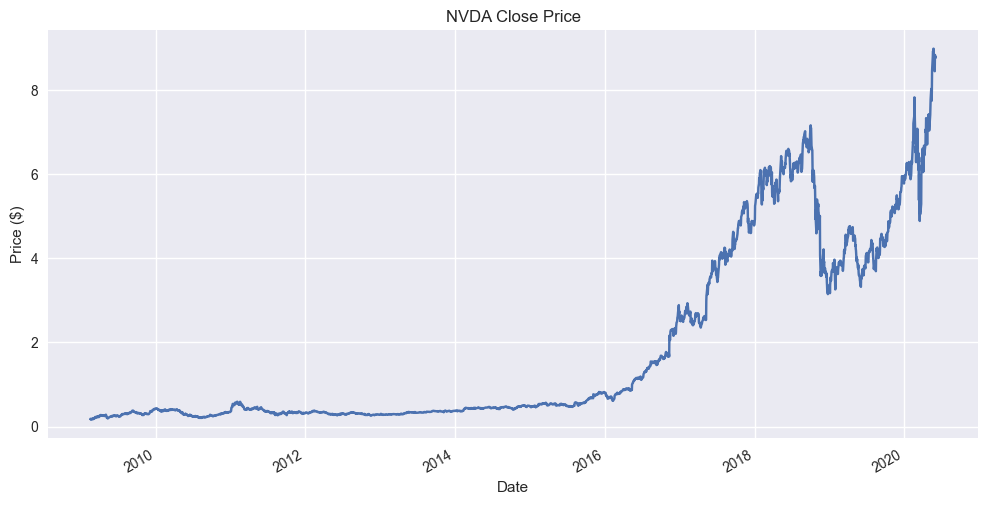

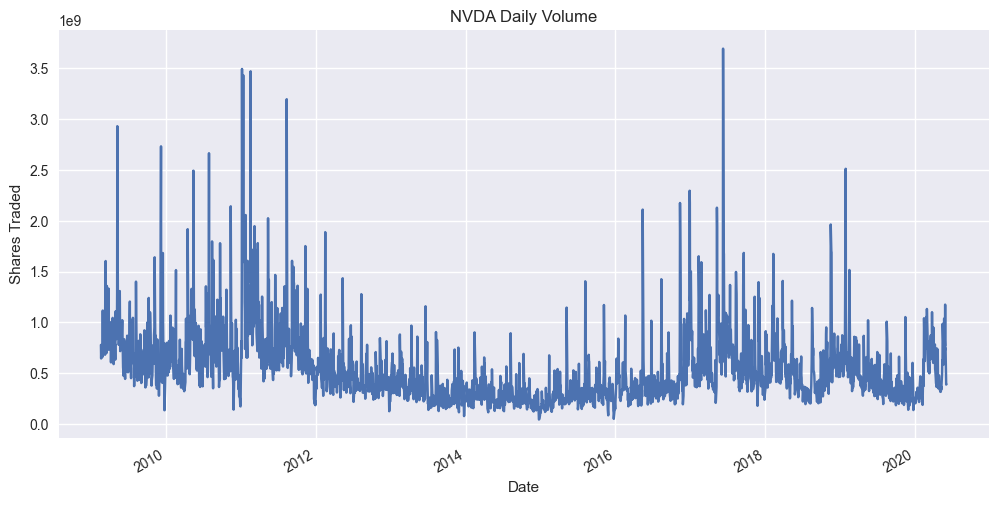

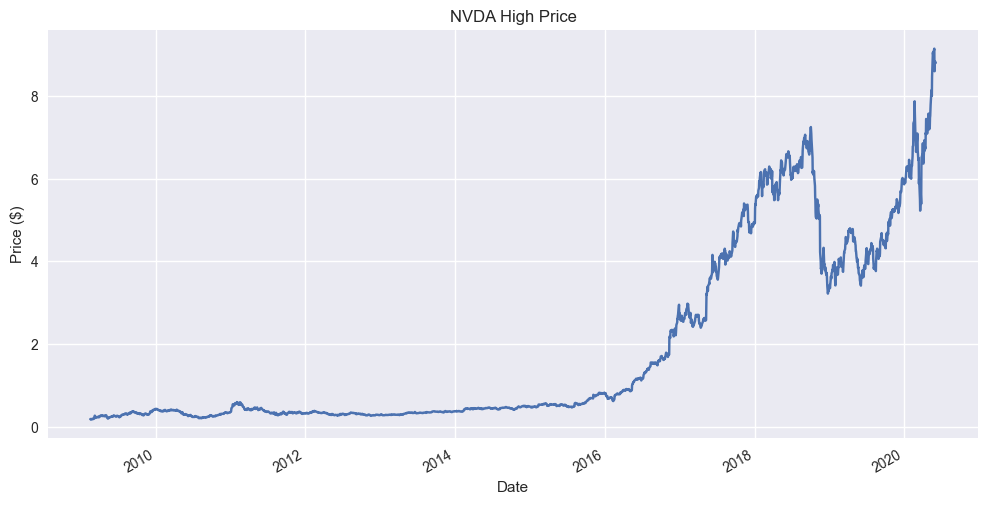

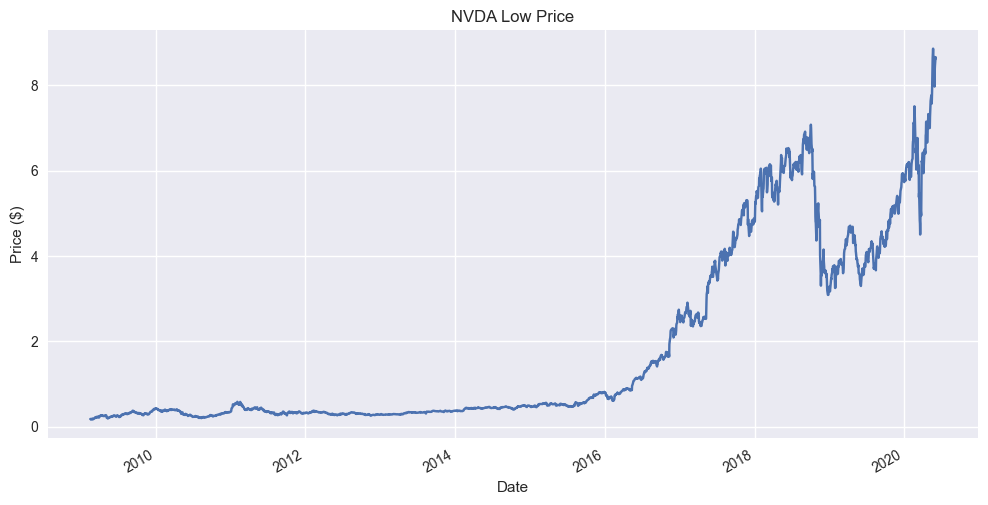

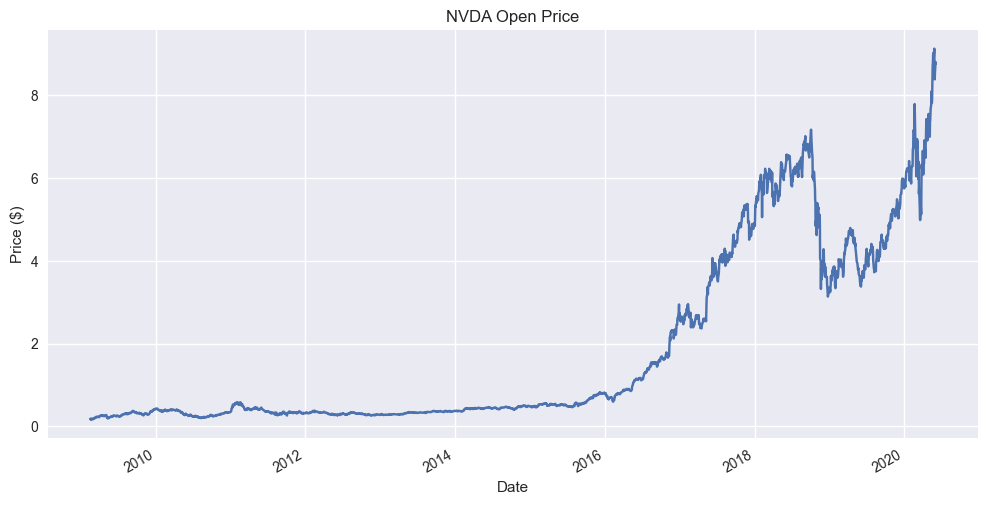

In [11]:


stock.plot_price()


## Stock price over time

## NVDA Close Price Chart Analysis
- Early Stagnation (2010–2016): The price remained relatively flat and low for several years, trading mostly between $0.20 and $0.70. This period showed low growth and high volatility for a low-priced stock.

- Massive Inflection Point (2016): Around 2016, the stock price hit a major inflection point and began a near-vertical, aggressive surge. This marks the shift as the company's chips became central to AI and data centers.

- Hyper-Growth (2016–2018): The price skyrocketed from under $1 to over $7, demonstrating an extreme rate of appreciation.

- Major Correction and Recovery (2018–2020): Similar to other tech stocks, NVDA suffered a significant correction in late 2018, dropping from the $7 range to $3. It then mounted a strong recovery, surging past its previous high to end the chart near $8.

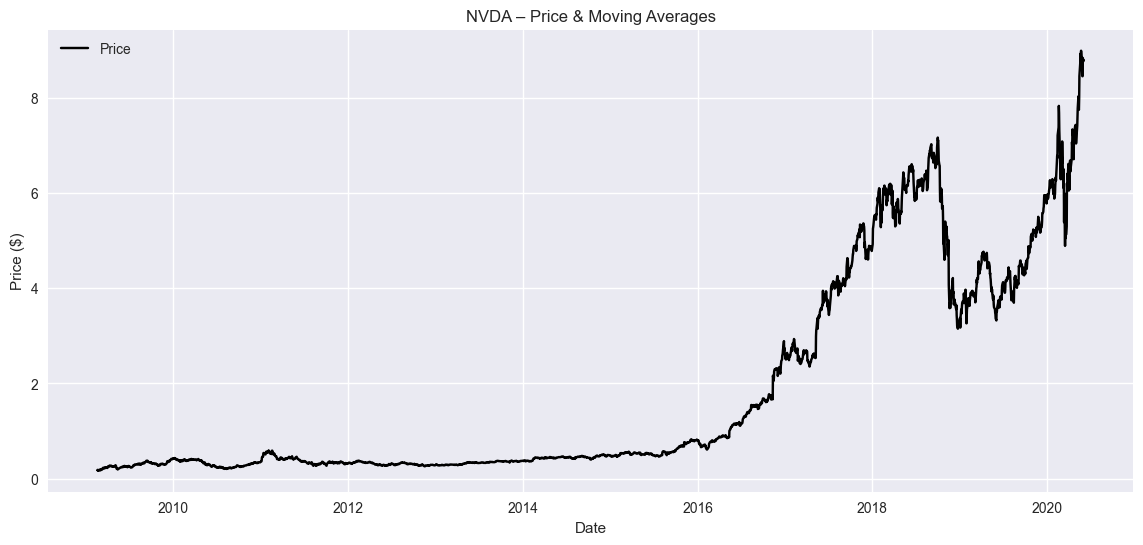

In [12]:

stock.plot_price_sma()


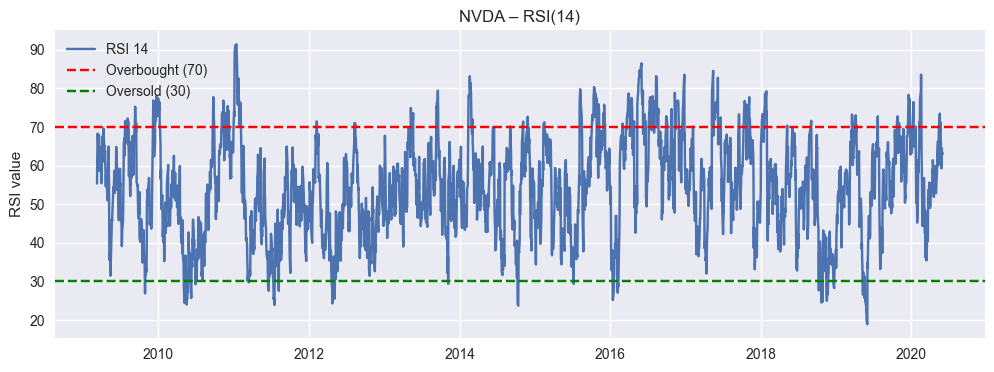

In [13]:



stock.plot_rsi()




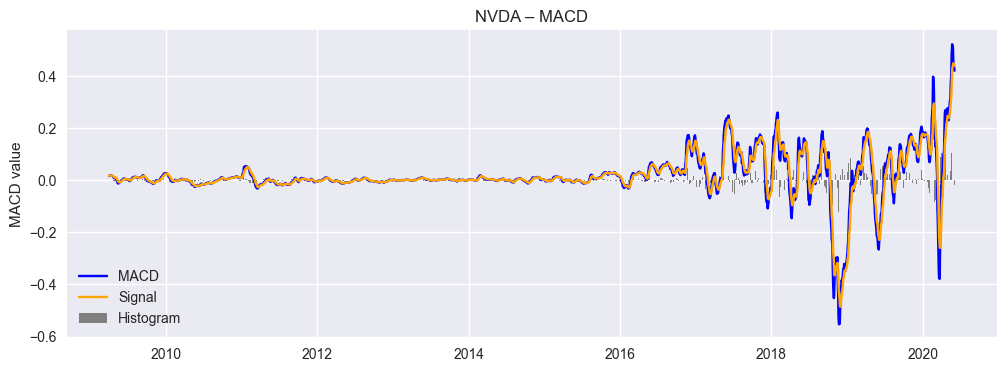

In [14]:
stock.plot_macd()


## NVDA - Price, Moving Averages Chart Analysis
The chart shows:

- 2010–2016 (Stagnation): The MAs would have been flat and tightly woven together, running directly alongside the price line (between $0.20 and $0.70). This would technically confirm the long period of a non-trending, consolidating market.

- Post-2016 (Hyper-Growth): The MAs would have experienced a dramatic shift, becoming steeply angled upward and significantly separated from each other.

- The Shorter-Term MA would be consistently and far above the Longer-Term MA. This is the clearest technical signal of an extremely powerful and healthy bull market.

- The price line, during its rallies, would often run far above both MAs, indicating an overextended condition fueled by high momentum.

- The 2018 Correction: During the sharp price drop, the price would have likely broken below the shorter-term MAs and potentially briefly touched or broken the longer-term MAs (which would have acted as strong support), confirming the correction but not a full trend reversal.

## NVDA - Relative Strength Index (RSI 14) Analysis
- Initial Fluctuation (2010–2016): The RSI spent this period swinging widely between the Overbought (70) and Oversold (30) lines while the price was flat. This is common for a low-priced stock that is consolidating and lacking a clear trend.

- Post-2016 Bullish Momentum: After 2016, the momentum profile shifts, with the RSI spending more time above the 50 centerline, consistently confirming the strong bullish trend.

- Extreme Overbought Signals: The indicator frequently spikes and stays well above the 70 line (Overbought) during the hyper-growth phase (2016–2018). This validates the intense buying pressure and high-momentum driving the stock's price acceleration.

- The 2018 Sell-off: The RSI registers a sharp, significant dip below the 30 line (Oversold) in late 2018, confirming that the severe price correction was driven by extreme panic-selling, a technical signal of a major, but temporary, momentum collapse.

## NVDA - MACD Analysis

- Initial Stagnation (2010–2016): The MACD Line (Blue) and Signal Line (Orange) remained extremely flat and tightly clustered around the zero line. This confirms the non-trending, low-momentum state of the stock price during this period.

- Post-2016 Inflection: The chart shows a sudden and dramatic shift after 2016, with the MACD beginning to oscillate with much greater amplitude.

- Extreme Volatility: The MACD is characterized by large, sharp swings (oscillations) that quickly move from strong positive readings to sharp negative readings. This confirms the high technical volatility of the stock during its hyper-growth phase.

- The 2018 Sell-off Confirmation: The deepest negative spike on the chart occurs in late 2018, dropping to approximately $\mathbf{-0.6}$. This extreme reading strongly confirmed the severe panic-selling momentum that drove the stock's major price correction.

- Strong Buy Momentum: Conversely, the sharp, large positive spikes (e.g., in late 2019/early 2020) show intense buying momentum, validating the powerful recoveries the stock experienced.